# ions_phonons

In [3]:
# Import libraries

import math
import numpy as np
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from scipy.optimize import curve_fit
from scipy import linalg
import re
pi = math.pi

In [4]:
############## PARAMETERS ##############
# time step
dt = 0.1 # micro s
# final time
t_fin = 200 # micro s
# number of time steps
t_steps = t_fin/dt
# Detune frequency
delta = 2*pi*0.015 # 2pi x MHz
# Lamb-Dicke parameter
eta = 0.05
# Frequencies ratio Omega/delta
freq_ratio = 0.25
# Energy difference betweeen two atomic levels
#w_0 = 2*pi*0.05 # 2pi x MHz
#W = delta*freq_ratio
# Vibrational frequency
#w_t = 2*pi*0.01 # 2pi x  MHz

# Pauli x matrix
sgm_x = np.array([[0.,1.],[1.,0.]])
# Pauli y matrix
sgm_y = np.array([[0.,-1j],[1j,0.]])
#Pauli z matrix
sgm_z = np.array([[1.,0.],[0.,-1.]])
# 2x2 identity
id_2 = np.eye(2)
# Ladder operators for phonon number
a_dagger = np.array([[0.,1.],[0.,0.]])
a = np.array([[0.,0.],[1.,0.]])
# time vector
t= np.arange(0, t_fin + dt, dt)
# state at time t
state = np.zeros(shape=(8,1))

In [5]:
# Define fround state
s_1 = np.array([[0.],[1.]])
s_2 = np.array([[0.],[1.]])
vib = np.array([[0.],[1.]])
gs = np.kron(s_1, np.kron(s_2, vib))


#def H_1(t):
#    return eta*0.5*W*np.kron(np.kron(sgm_x,id_2) + np.kron(id_2,sgm_x), a_dagger*np.exp(-1j*delta*t)+ a*np.exp(1j*delta*t))

def D(x):
    return linalg.expm(np.kron(x, a_dagger)- np.kron(x.conj().T, a))

def alpha(t,freq_ratio):
    return 1j*freq_ratio*(1- np.exp(1j*delta*t))

def Phi(t, freq_ratio):
    return (freq_ratio**2)*(delta*t - np.sin(delta*t))

def S_x():
    return np.kron(sgm_x, id_2) + np.kron(id_2, sgm_x) 
def U(t, freq_ratio):
    A = alpha(t,freq_ratio)*S_x()
    d = D(A)
    C = linalg.expm(1j*Phi(t, freq_ratio)*np.kron(2*np.kron(id_2,id_2) + 2*np.kron(sgm_x, sgm_x), id_2))
    U = d @ C
    return U
def expectation_z1(state):
    return float(np.real(state.conj().T @ np.kron(np.kron(sgm_z, id_2),id_2) @ state))
def expectation_z2(state):
    return float(np.real(state.conj().T @ np.kron(np.kron(id_2, sgm_z),id_2) @ state))


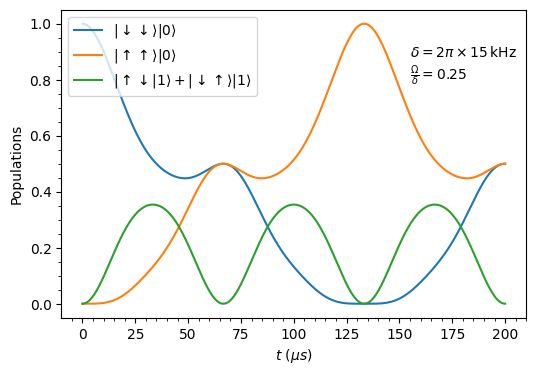

In [14]:

pop00 = []
pop00_excited = []
pop11 = []
pop11_excited = []
pop10 = []
pop1001_excited = []
pop01 = []
pop01_excited = []
norm = []
sum_pop = []
for kk in np.arange(0, int(t_steps)+1, 1):
    state = U(t[kk], freq_ratio) @ gs
    pop00.append(np.abs(state[7])**2)
    pop11.append(np.abs(state[1]**2))
    pop1001_excited.append(np.abs(state[2])**2 + np.abs(state[4])**2)
    #sum_pop.append(pop00[kk] + pop11[kk] + pop1001_excited[kk])

# Plot of populations
cmap = plt.get_cmap('tab20')
w = 6
h = 4
fig = plt.figure(figsize=(w,h))
plt.plot(t,pop00, color = cmap(0), label = '$| \downarrow \downarrow \\rangle | 0\\rangle$')
plt.plot(t,pop11, color = cmap(2), label = '$| \\uparrow \\uparrow \\rangle | 0\\rangle$')
plt.plot(t,pop1001_excited, color = cmap(4), label = '$|\\uparrow \\downarrow|   1 \\rangle + |\\downarrow \\uparrow\\rangle |   1 \\rangle$')
#plt.plot(t, sum_pop)
plt.xlabel('$t \,\,(\mu s)$')
plt.ylabel('Populations')
text = '$\delta = 2\pi\\times 15\,\mathrm{kHz}$\n$\\frac{\Omega}{\delta} = 0.25$'
plt.text(155, 0.8,text)
plt.minorticks_on()
plt.legend()
plt.show()
 

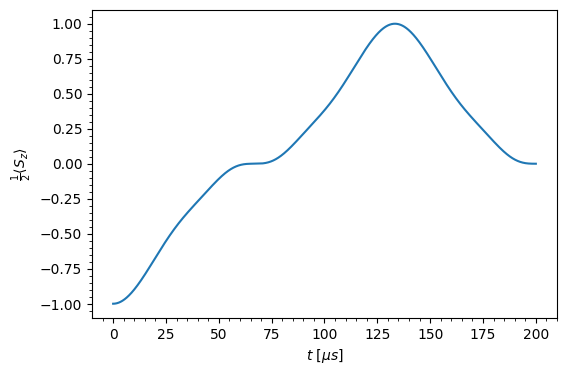

In [18]:
ratios = [0.01, 0.1, 0.25, 0.5, 2]
mean_z = np.empty((len(ratios), int(t_steps)+1))
#for  fr in range(0,len(ratios)):
for kk in np.arange(0, int(t_steps)+1, 1):
    state = U(t[kk], ratios[2]) @ gs
    mean_z[2][kk] = 0.5*expectation_z1(state) + 0.5*expectation_z2(state)

# Plot of mean <sgm_z>
cmap = plt.get_cmap('tab20')
w = 6
h = 4
fig = plt.figure(figsize=(w,h))
plt.plot(t,mean_z[2,:], color = cmap(0))
#plt.plot(t,mean_z[1,:], color = cmap(2))
#plt.plot(t,mean_z[2,:], color = cmap(4))
#plt.plot(t,mean_z[3,:], color = cmap(6))
#plt.plot(t,mean_z[4,:], color = cmap(8))
plt.xlabel('$t$ [$\mu s$]')
plt.ylabel('$\\frac{1}{2}\langle S_z\\rangle$')
plt.minorticks_on()
#plt.legend()
plt.show()